# Horizontal Lattice Walk Using General Method

In [1]:
import numpy as np
import networkx as nx
import sys
sys.path.append('..')
from CoinedModel import *
from PlotModule import *
from neblina import init_engine, stop_engine

In [2]:
#initialises neblina-core
init_engine(0) #TODO: transfer this to inferface (check if it is already initialised)

In [3]:
#generating adjacency matrix of a 5x5 2d-horizontal-latiice
grid_dim = 5
G = nx.grid_graph(dim=(grid_dim, grid_dim), periodic=True)
adj_matrix = nx.adjacency_matrix(G)
del G #only the adjacency matrix is going to be used

In [4]:
#creating specific initial condition
mid_vert = int(np.ceil(grid_dim**2 / 2)) - 1
#beware that the coin is 4-sided,
#thus, the initial condition being in the middle vertex,
psi0 = np.zeros(4*grid_dim**2, dtype=float)
psi0[4*mid_vert] = 1 #pointing downward
psi0[4*mid_vert + 1] = -1 #poiting leftward
psi0[4*mid_vert + 2] = -1 #pointing rightward
psi0[4*mid_vert + 3] = 1 #pointing upward
psi0 = psi0 / 2

In [5]:
#simulating walk
U = EvolutionOperator_CoinedModel(adj_matrix)
num_steps = 1
halfway_state = SimulateWalk(U, psi0, num_steps)[0]
final_state = SimulateWalk(U, halfway_state, num_steps)[0]

TODO: vector_delete from pyneblina is not available
TODO: vector_delete from pyneblina is not available
TODO: vector_delete from pyneblina is not available
TODO: vector_delete from pyneblina is not available


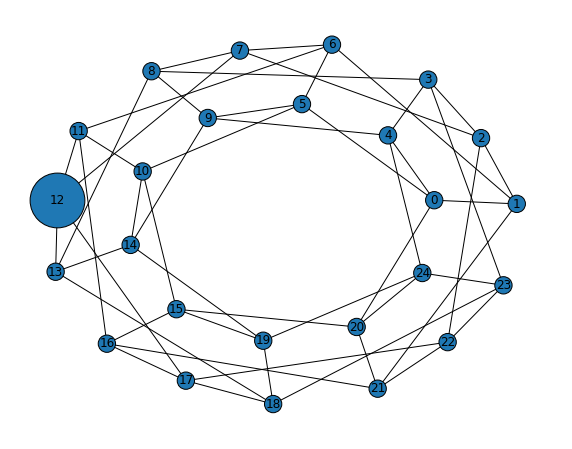

In [6]:
#plots initial state probability
prob = ProbabilityDistribution(adj_matrix, psi0)
PlotProbabilityDistributionOnGraph(adj_matrix, prob)

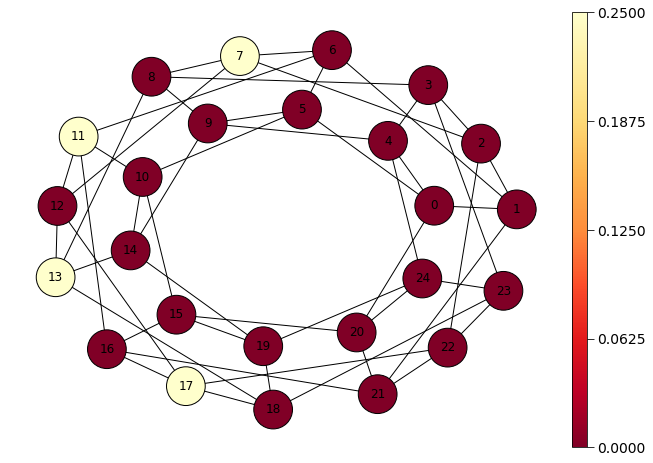

In [7]:
#plots the state probability after #num_steps applications of the evolution operator
prob = ProbabilityDistribution(adj_matrix, halfway_state)
PlotProbabilityDistributionOnGraph(adj_matrix, prob, prob_node_size=False, cmap='default', node_size=1500)

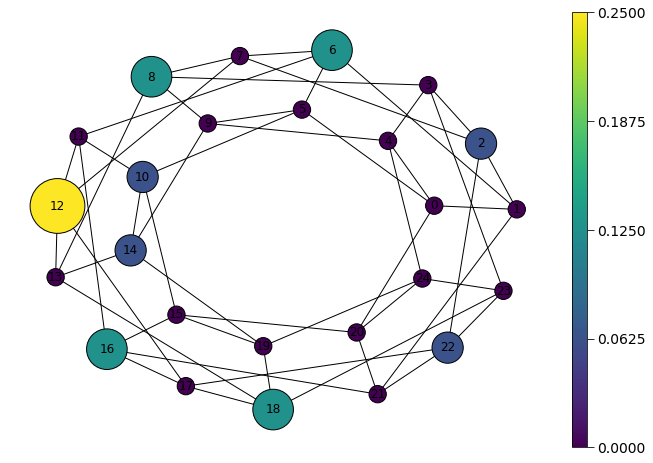

In [8]:
#plots the state probability after #2*num_steps applications of the evolution operator
prob = ProbabilityDistribution(adj_matrix, final_state)
PlotProbabilityDistributionOnGraph(adj_matrix, prob, cmap='viridis')

In [9]:
num_steps = int((grid_dim - 1))
states = SimulateWalk(U, psi0, num_steps, save_interval=1)
probs = [ProbabilityDistribution(adj_matrix, s) for s in states]
probs

TODO: vector_delete from pyneblina is not available
TODO: vector_delete from pyneblina is not available
TODO: vector_delete from pyneblina is not available
TODO: vector_delete from pyneblina is not available
TODO: vector_delete from pyneblina is not available
TODO: vector_delete from pyneblina is not available
TODO: vector_delete from pyneblina is not available
TODO: vector_delete from pyneblina is not available


[array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ,
        0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ]),
 array([0.    , 0.    , 0.0625, 0.    , 0.    , 0.    , 0.125 , 0.    ,
        0.125 , 0.    , 0.0625, 0.    , 0.25  , 0.    , 0.0625, 0.    ,
        0.125 , 0.    , 0.125 , 0.    , 0.    , 0.    , 0.0625, 0.    ,
        0.    ]),
 array([0.      , 0.015625, 0.015625, 0.015625, 0.      , 0.015625,
        0.      , 0.203125, 0.      , 0.015625, 0.015625, 0.203125,
        0.      , 0.203125, 0.015625, 0.015625, 0.      , 0.203125,
        0.      , 0.015625, 0.      , 0.015625, 0.015625, 0.015625,
        0.      ]),
 array([0.0078125 , 0.0078125 , 0.015625  , 0.0078125 , 0.0078125 ,
        0.0078125 , 0.015625  , 0.00390625, 0.015625  , 0.0078125 ,
        0.015625  , 0.00390625, 0.765625  , 0.00390625, 0.015625  ,
        0.0078125 , 0.015625  , 0.00390625, 0.015625  , 0.0078125 ,
        0.0078125 , 0.0078

In [10]:
#stops neblina-core
stop_engine()